# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-11-07 09:13:58.097018


In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-11-07 09:13:58.109118


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 2s 0us/step
2019-11-07 09:14:01.244917


(60000, 28, 28)
2019-11-07 09:14:01.286160


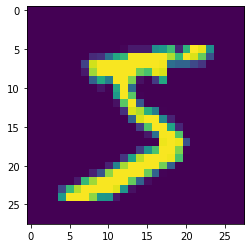

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-11-07 09:14:01.487766


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-11-07 09:14:01.601849


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-11-07 09:14:01.609565


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-11-07 09:14:01.623117


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-11-07 09:14:01.631775


In [16]:
## MAIN BLOCK

from keras.layers import Activation
from keras.layers import Input,Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
#model = Sequential() 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))


x1 = Input(shape = (28,28,1))

x2= Conv2D(32,(3,3),padding='same', activation='relu')(x1)

add1=keras.layers.add([x1,x2])
x3= Conv2D(32,(3,3),padding='same', activation='relu')(add1)

add2=keras.layers.add([x3,x1,x2])
x4=MaxPooling2D((2, 2))(add2)

x5= Conv2D(32,(3,3),padding='same', activation='relu')(x4)

add3=keras.layers.add([x4,x5])
x6=Conv2D(32,(3,3),padding='same', activation='relu')(add3)

add4=keras.layers.add([x4,x5,x6])
x7=Conv2D(32,(3,3),padding='same', activation='relu')(add4)

add5=keras.layers.add([x5,x6,x7])
x8=MaxPooling2D((2, 2))(add5)

x9=Conv2D(32,(3,3),padding='same', activation='relu')(x8)


add6=keras.layers.add([x8,x9])
x10=Conv2D(32,(3,3),padding='same', activation='relu')(add6)

add7=keras.layers.add([x8,x9,x10])
x11=Conv2D(32,(3,3),padding='same', activation='relu')(add7)


x12=Convolution2D(10, 1,padding='same')(x11)
gap1 = GlobalAveragePooling2D()(x12)
softmax = Activation('softmax')(gap1)



model = keras.Model(inputs = x1, outputs = softmax)



print(datetime.datetime.now())

2019-11-07 09:27:41.606951


In [17]:
model.summary()

print(datetime.datetime.now())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 28, 28, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
add_15 (Add)                    (None, 28, 28, 32)   0           input_4[0][0]                    
                                                                 conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 28, 28, 32)   9248        add_15[0][0]               

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-11-07 09:27:48.150679


In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 35s 582us/step - loss: 0.3148 - acc: 0.8959
Epoch 2/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0793 - acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.0570 - acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.0463 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.0371 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.0315 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.0256 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.0239 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0198 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 27s 452us/step 

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-11-07 09:32:33.221657


In [21]:
print(score)
print(datetime.datetime.now())

[0.021776696612650265, 0.9927]
2019-11-07 09:32:33.240680
